# Stato dei pazienti in Italia
Andamento dello stato dei pazienti affetti da Coronavirus in Italia.

In [25]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
from math import floor

from src.data.read_dataset import get_processed_dataset
from src.visualization import visualize

In [26]:
df = get_processed_dataset('dpc_regioni_long')
domain = ['Deceduti', 'ICU', 
          'Guariti']
range_ = ['red', 'orange', 'green']


In [27]:
alt.themes.enable('theme_1')
alt.Chart(df).mark_line().encode(
    y=alt.Y('sum(value)', stack=None),
    x='data:T',
    color=alt.Color('status:N', scale=alt.Scale(domain=domain, range=range_), sort=domain)
).properties(
    height=600,
    width=800
).transform_filter(
    alt.FieldOneOfPredicate(field='status', oneOf=['Deceduti', 'ICU', 'Guariti'])
).configure_legend(labelLimit=0).interactive()

alt.Chart(...)

In [28]:
alt.Chart(get_processed_dataset('dpc_regioni')).mark_line().encode(
    y=alt.Y('sum(tamponi)', stack=None),
    x='data:T',
).properties(
    height=600,
    width=800
).configure_legend(labelLimit=0).interactive()

alt.Chart(...)

# Other stats
Reported below are:
- Lethality: number of deaths divided by number of total cases
- ICU percentage: percentage of patients in ICU out of active confirmed positive cases
- Positive percentage: ratio of positive cases over all executed tests

In [29]:
df = get_processed_dataset('dpc_nazionale')

In [30]:
df['ICU_percentage'] = df.terapia_intensiva / df.totale_attualmente_positivi
df['lethality'] = df.deceduti / df.totale_casi
df['positive_percentage'] = df.totale_casi / df.tamponi

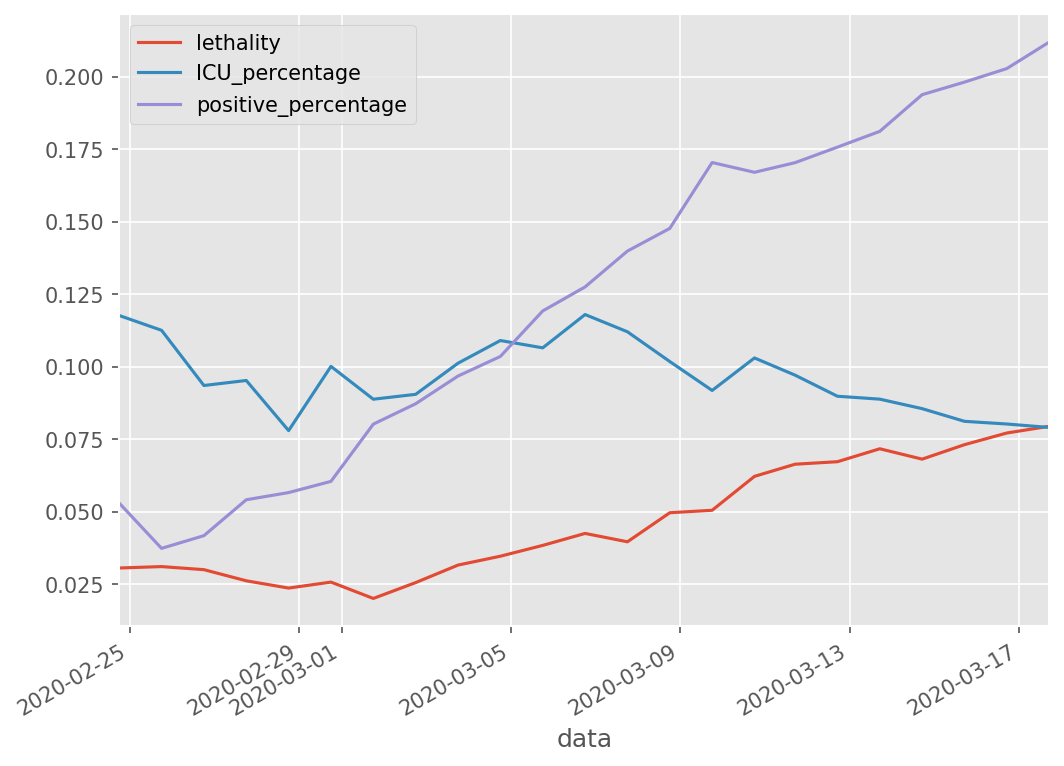

In [31]:
plt.style.use('ggplot')
_ = df.plot(x='data', y=['lethality', 'ICU_percentage', 'positive_percentage'], figsize=(8,6))

In [43]:
dfn = df.set_index('data').drop('stato', axis=1)

Text(0.5, 1.0, 'Nuovi attualmente positivi')

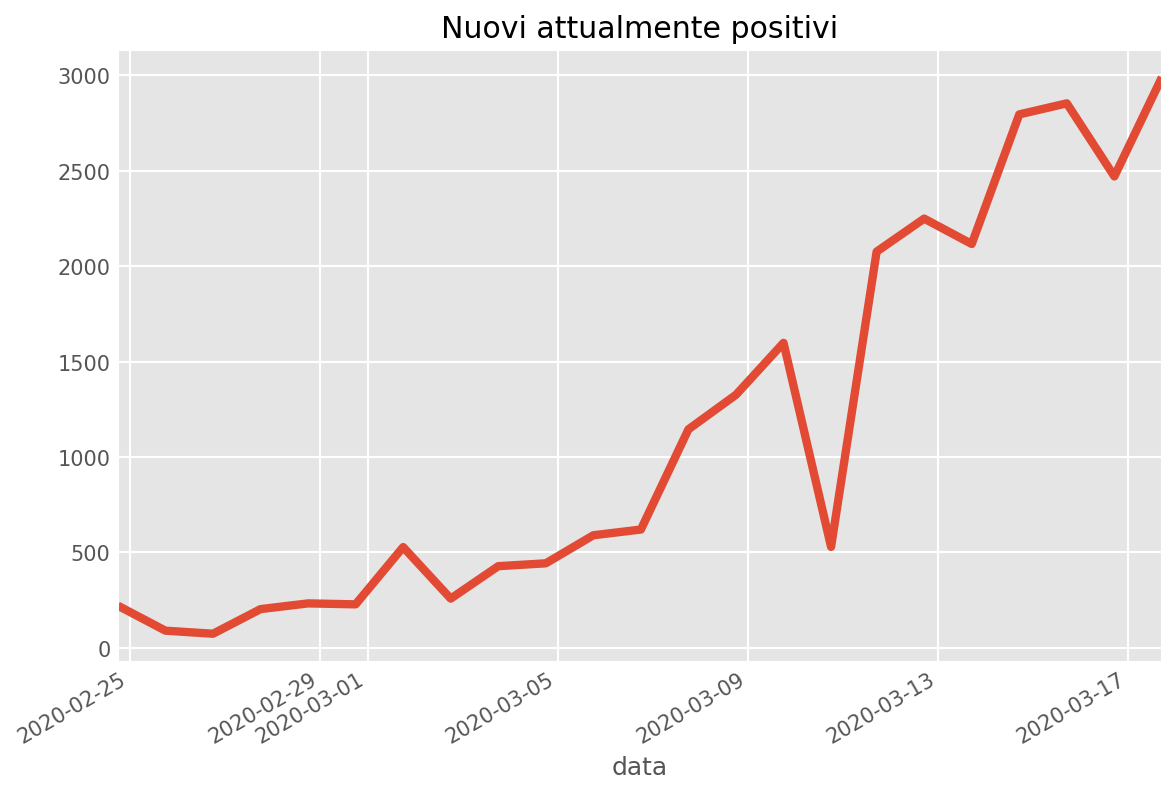

In [55]:
plt.style.use('ggplot')
dfn.nuovi_attualmente_positivi.plot(figsize=(8,6))
plt.title('Nuovi attualmente positivi')